In [65]:
# Python3 script to run simulations with all methods
# Calculate the F-distance (error) on-the-fly
import csv
import subprocess
import os
import time
import h5py
import numpy as np
import copy
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# # 200 s
# def execute_and_log_command(command, log_file):
#     with open(log_file, 'w') as log:
#         log.write(f"Executing: {command}\n")
#         try:
#             result = subprocess.run(command, shell=True, check=True, text=True, capture_output=True)
            
#             # Log the output and errors
#             log.write("Output:\n")
#             log.write(result.stdout)
#             log.write("Error (if any):\n")
#             log.write(result.stderr)
#         except subprocess.CalledProcessError as e:
#             # Log the error details
#             log.write(f"An error occurred while executing: {command}\n")
#             log.write(f"Return Code: {e.returncode}\n")
#             log.write("Output:\n")
#             log.write(e.stdout)
#             log.write("Error Message:\n")
#             log.write(e.stderr)
        
#         log.write('-' * 40 + '\n')  # Separator for readability

# def frobenius_distance(matrix1, matrix2):
#     """Calculates the Frobenius norm distance between two matrices."""
#     matrix1 = np.array(matrix1)
#     matrix2 = np.array(matrix2)
#     if matrix1.shape != matrix2.shape:
#       raise ValueError("Matrices must have the same shape")
    
#     diff = matrix1 - matrix2
#     distance = np.linalg.norm(diff, 'fro')
#     return distance
    

In [66]:
# # def main():

# start_time = time.perf_counter()

# log_view_dir = 'perf'
# os.makedirs(log_view_dir, exist_ok=True)
# # List of Linux commands to execute

# # Create a directory for logs if it doesn't exist
# log_screen_dir = 'command_logs'
# os.makedirs(log_screen_dir, exist_ok=True)
# # List of Linux commands to execute
# # The default time step length is 1 year

# commands = [
#     # pylith step01a_slip_ts.cfg --mesh_generator.refiner.levels=1 --petsc.ts_type=beuler --petsc.ts_adapt_type=none --petsc.log_view=ascii:./perf/0.txt > ./command_logs/command_log_0.txt
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=beuler --petsc.ts_adapt_type=none --petsc.log_view=ascii:./" + log_view_dir + "/1.txt",     # reference model
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=cn --petsc.ts_adapt_type=none --petsc.log_view=ascii:./" + log_view_dir + "/2.txt",
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=beuler --petsc.ts_adapt_type=basic --petsc.log_view=ascii:./" + log_view_dir + "/3.txt",  
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=cn --petsc.ts_adapt_type=basic --petsc.log_view=ascii:./" + log_view_dir + "/4.txt",  
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=bdf --petsc.ts_adapt_type=basic  --petsc.ts_bdf_order=1 --petsc.log_view=ascii:./" + log_view_dir + "/5.txt", 
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=bdf --petsc.ts_adapt_type=basic --petsc.ts_bdf_order=2 --petsc.log_view=ascii:./" + log_view_dir + "/6.txt", 
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=bdf --petsc.ts_adapt_type=basic --petsc.ts_bdf_order=3 --petsc.log_view=ascii:./" + log_view_dir + "/7.txt", 
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=bdf --petsc.ts_adapt_type=basic --petsc.ts_bdf_order=4 --petsc.log_view=ascii:./" + log_view_dir + "/8.txt", 
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=bdf --petsc.ts_adapt_type=basic --petsc.ts_bdf_order=5 --petsc.log_view=ascii:./" + log_view_dir + "/9.txt",
#     "pylith step01a_slip_ts.cfg --petsc.ts_type=bdf --petsc.ts_adapt_type=basic --petsc.ts_bdf_order=6 --petsc.log_view=ascii:./" + log_view_dir + "/10.txt",
#     # "pylith step01a_slip_ts.cfg --petsc.ts_type=irk --petsc.ts_adapt_type=basic --petsc.log_view=ascii:./perf/11.txt",
# ]

# N = len(commands)

# distance = np.zeros(N)
# # Execute each command and log to separate files

# # load the baseline data (high resolution)
# filename = "output_baseline/refmodel_refine3_beuler_dt1year-domain.h5"
# with h5py.File(filename, "r") as f:

#     vertex_fields = list(f.keys())[2]

#     displacement = list(f[vertex_fields])[0]    # data name in the group
#     data_tmp = f[vertex_fields][displacement]
#     data_baseline = np.squeeze(data_tmp[-1,:,:])

#     # print(f'Baseline model: Total timestep:', {data_baseline.shape[0]}, 'Total nodes' , {data_baseline.shape[1]},'d.o.f.' , {data_baseline.shape[2]} ) 

#     # spatial location
#     geometry = list(f.keys())[0]
#     vertices = list(f[geometry])[0]    # data name in the group
#     xz_baseline_tmp = f[geometry][vertices]  # 2*2
#     xz_baseline = xz_baseline_tmp[:,:]



In [67]:
# for i, command in enumerate(commands, 1):
#     log_file = os.path.join(log_screen_dir, f"command_log_{i}.txt")
#     print(command)
#     execute_and_log_command(command, log_file)

#     # print(i)       
        
#     filename = "output/step01a_slip_ts-domain.h5"
    
#     with h5py.File(filename, "r") as f:
#         # Print all root level object names (aka keys) 
#         # these can be group or dataset names 
#         # print("Keys: %s" % f.keys())
#         # get first object name/key; may or may NOT be a group
#         vertex_fields = list(f.keys())[2]
#         displacement = list(f[vertex_fields])[0]    # data name in the group
#         data_tmp = f[vertex_fields][displacement]
#         data = np.squeeze(data_tmp[-1,:,:])    # 2D 
#         # np.save('data_'+ str(i)  + '.npy', data)

#         # print(f'Total timestep:', {data.shape[0]}, 'Total nodes' , {data.shape[1]},'d.o.f.' , {data.shape[2]} ) 
#         # print(data.dtype)
#         # spatial location
#         geometry = list(f.keys())[0]
#         vertices = list(f[geometry])[0]    # data name in the group
#         xz_tmp = f[geometry][vertices]      # 2D  
#         xz = xz_tmp[:,:]
#         # np.save('xz_'+ str(i)  + '.npy', xz)
        
#     # print(xz.dtype)
#     # upsampling (interpolation) the final solution field to the high res results
#     # data -> data_upsample   
#     # data_upsample = data_upsample_tmp[:,:]

#     data_upsample_x = griddata(xz, data[:,0], xz_baseline, method='cubic')
#     data_upsample_y = griddata(xz, data[:,1], xz_baseline, method='cubic')
#     # print(data_upsample_x.shape)
#     # print(data_upsample_y.shape)

#     data_upsample = np.vstack((data_upsample_x, data_upsample_y)).T     # 12298*2

#     # if i == 1:     # save the baseline model
#     #     data_baseline = data
#     # else:       # compare other low-res results with the baseline model of high resolution
#     #     # print(data_upsample.shape)
#     #     distance[i-1] = frobenius_distance(data_baseline, data)

#     distance[i-1] = frobenius_distance(data_baseline, data_upsample)
                        
# print("The frobenius-distance is: " + str(distance))
# end_time = time.perf_counter()
# elapsed_time = end_time - start_time
# print(f"Elapsed time: {elapsed_time:.6f} seconds")
# print(f"Commands have been executed and logs are saved in '{log_screen_dir}' directory")

# print(distance)
# # save the data


# np.save('distance_methods.npy', distance)


In [68]:
# distance = np.load("distance_methods_4_2.npy")

# print(distance)

In [69]:

# # load the baseline data (high resolution)
# filename = "output_baseline/refmodel_refine4_beuler_dt1year-domain.h5"
# with h5py.File(filename, "r") as f:

#     vertex_fields = list(f.keys())[2]

#     displacement = list(f[vertex_fields])[0]    # data name in the group
#     data_tmp = f[vertex_fields][displacement]
#     data_baseline = np.squeeze(data_tmp[-1,:,:])

#     n_nodes = np.size(data_baseline, 0)

#     print(n_nodes)

#     # print(f'Baseline model: Total timestep:', {data_baseline.shape[0]}, 'Total nodes' , {data_baseline.shape[1]},'d.o.f.' , {data_baseline.shape[2]} ) 

#     # spatial location
#     geometry = list(f.keys())[0]
#     vertices = list(f[geometry])[0]    # data name in the group
    # xz_baseline_tmp = f[geometry][vertices]  # 2*2
    # xz_baseline = xz_baseline_tmp[:,:]




In [ ]:
# load the baseline data (high resolution)
# filename = "output_baseline/refmodel_refine4_beuler_dt1year-domain.h5"
filename = "output_baseline/refmodel_refine3_order2_beuler_dt1year-domain.h5"
with h5py.File(filename, "r") as f:

    vertex_fields = list(f.keys())[2]

    displacement = list(f[vertex_fields])[0]    # data name in the group
    data_tmp = f[vertex_fields][displacement]
    data_baseline = np.squeeze(data_tmp[-1,:,:])

    n_nodes = np.size(data_baseline, 0)

    print(n_nodes)

    # print(f'Baseline model: Total timestep:', {data_baseline.shape[0]}, 'Total nodes' , {data_baseline.shape[1]},'d.o.f.' , {data_baseline.shape[2]} ) 

    # spatial location
    geometry = list(f.keys())[0]
    vertices = list(f[geometry])[0]    # data name in the group
    xz_baseline_tmp = f[geometry][vertices]  # 2*2
    xz_baseline = xz_baseline_tmp[:,:]

48530


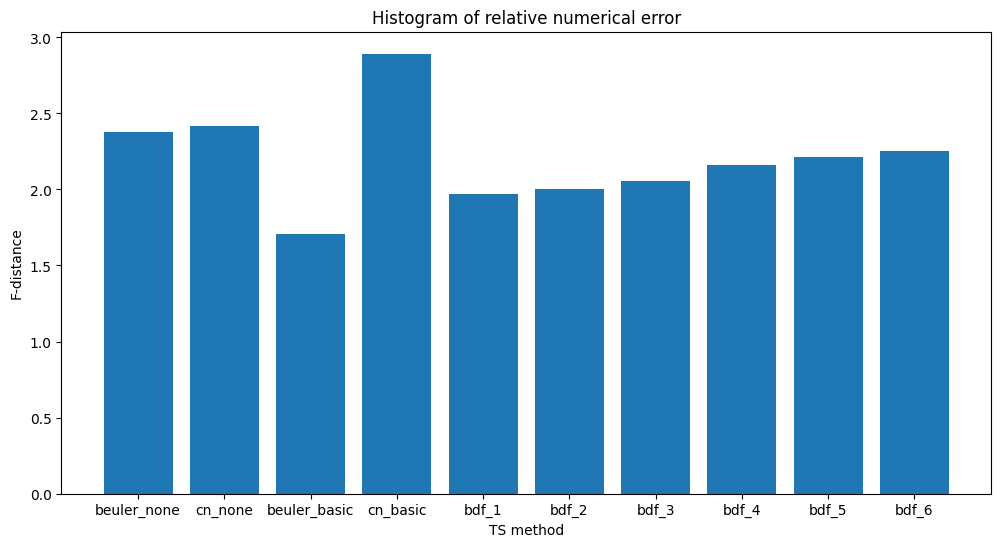

In [71]:
distance = np.load("distance_methods_31.npy")

plt.figure(figsize=(12, 6))

x_labels = ["beuler_none","cn_none","beuler_basic","cn_basic","bdf_1","bdf_2","bdf_3","bdf_4","bdf_5","bdf_6"]

x_positions = range(len(x_labels))

# plt.bar(x_positions, np.abs(distance- min(distance)))
plt.bar(x_positions, distance)
plt.xticks(x_positions, x_labels)
plt.xlabel('TS method')
plt.ylabel('F-distance')
plt.title('Histogram of relative numerical error')
plt.show()


In [72]:


# if __name__ == "__main__":
#     main()